<h2>Module 2 Project - King County Home Sales</h2>


# Obtain and Scrub

## I will use the OSEMN process to produce a model for the given data
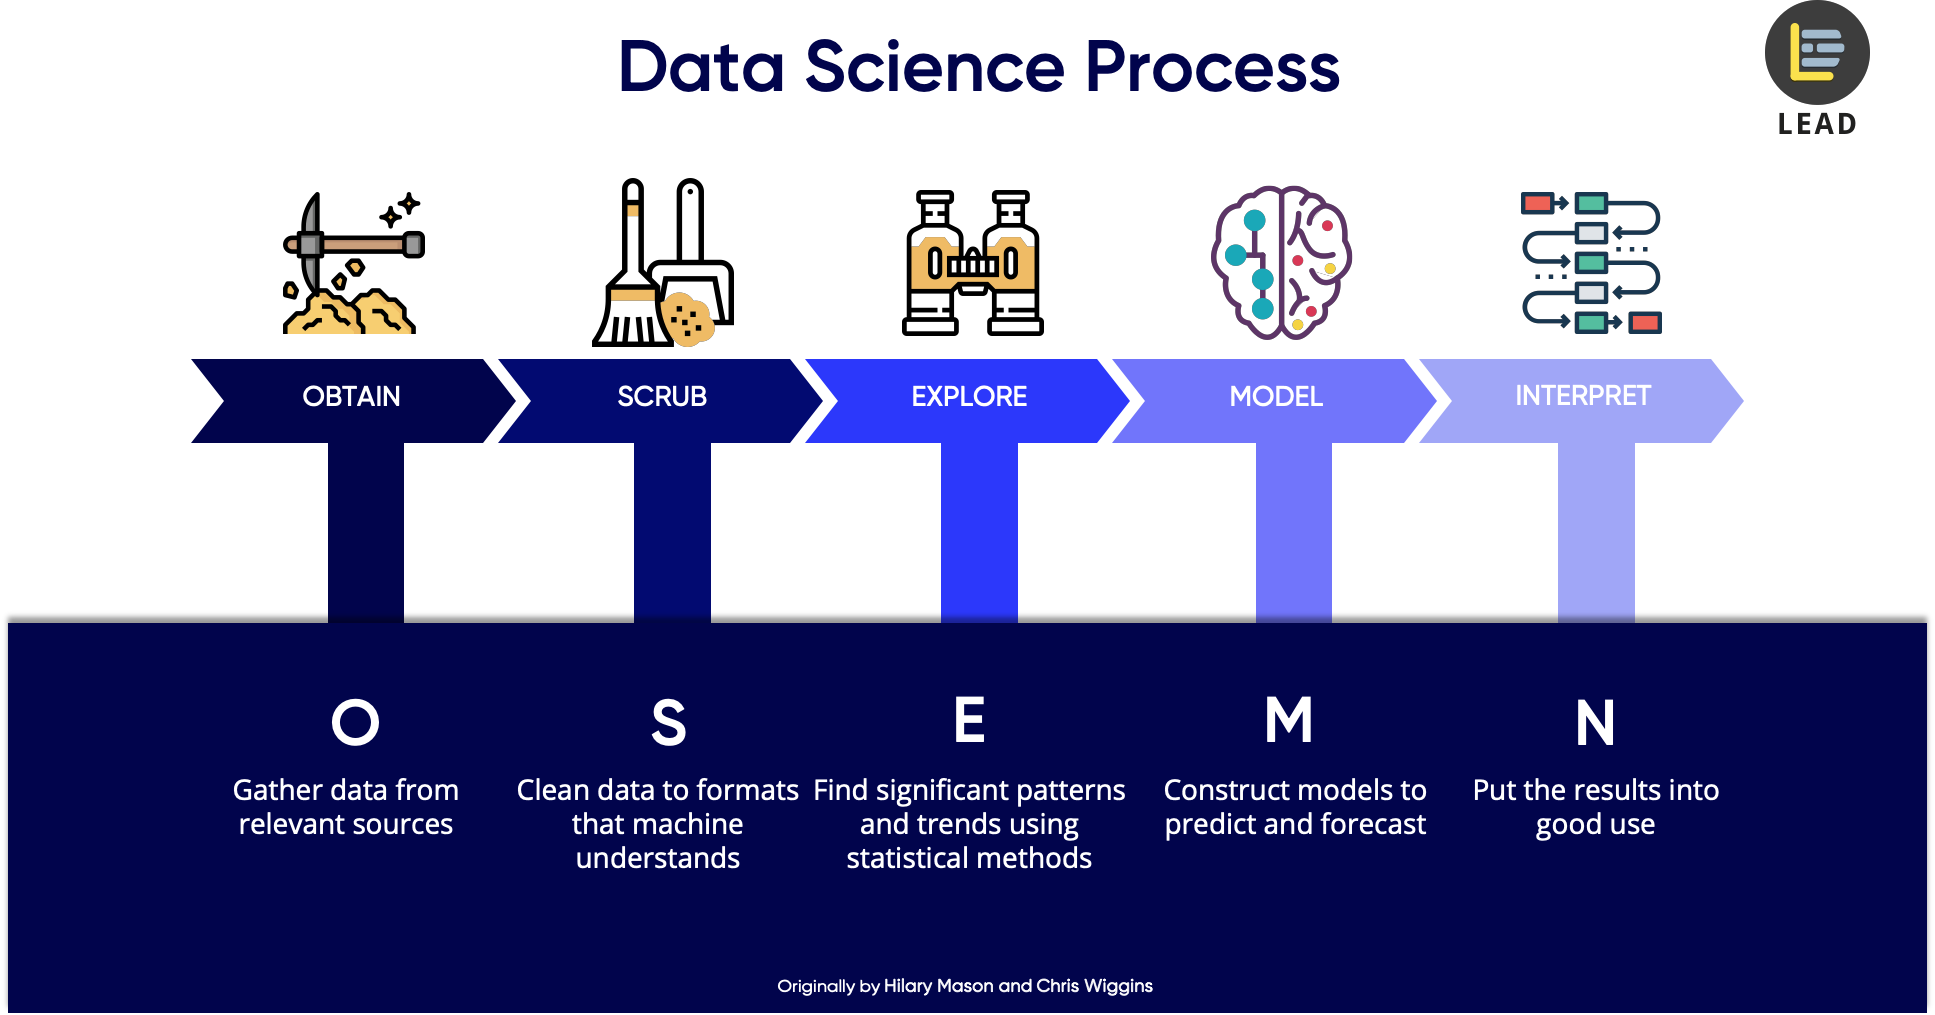

## Setting the Stage

In [2]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [4]:
# Read in file provided
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
# General data descriptions
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Identify missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning

### Basement
The basement has question marks. I will replace the question marks with zeros and change the column to integers.

In [9]:
# Change question marks to zeros
df.sqft_basement = df.sqft_basement.replace('?', '0')

# Change to int
df.sqft_basement = df.sqft_basement.map(lambda x: int(x.replace('.0', '')))

### View, Waterfront, and  Year Renovated
View waterfront and year renovated columns have missing values. I felt replaceing each missing value with zeros will not significantly alter the outcome.

In [11]:
df.view_nums = df['view'].isna().sum() / len(df)
df.waterfront_nums = df['waterfront'].isna().sum() / len(df)
df.yr_renovated_nums = df['yr_renovated'].isna().sum() / len(df)

print(df.view_nums, df.waterfront_nums, df.yr_renovated_nums) 

0.0029170718155299346 0.11001527989998611 0.17789507802009538


In [12]:
# Fill na with zeros and change to int
df.view = df['view'].fillna(0.0).astype('int64')  # 2.9% 
df.waterfront = df['waterfront'].fillna(0.0).astype('int64')  # 11%
df.yr_renovated = df['yr_renovated'].fillna(0.0).astype('int64')   # 17.8%

### Format the Date

In [15]:
# Change question marks to zeros
df.date = df.sqft_basement.replace('-', '/')

In [16]:
# Change date from string to date/time 
#df.date = df.date.to_datetime()
df["date"]= pd.to_datetime(df["date"]).dt.strftime('%m/%d/%Y')
df.date

0        01/01/1970
1        01/01/1970
2        01/01/1970
3        01/01/1970
4        01/01/1970
            ...    
21592    01/01/1970
21593    01/01/1970
21594    01/01/1970
21595    01/01/1970
21596    01/01/1970
Name: date, Length: 21597, dtype: object

### Handling duplicates

#### Complete duplicates

In [18]:
# Checking for duplicate rows again after changing NAs to 0
df.duplicated().sum()

3

In [19]:
# Find the 3 duplicated rows
duplicates = df[df.duplicated()]
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3947,1825069031,01/01/1970,550000.0,4,1.75,2410,8447,2.0,0,3,...,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14969,6308000010,01/01/1970,585000.0,3,2.50,2290,5089,2.0,0,0,...,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20038,8648900110,01/01/1970,555000.0,3,2.50,1940,3211,2.0,0,0,...,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [20]:
# Remove the duplicates
df = df.drop_duplicates(keep='last')

### Find duplicate homes

In [22]:
df.sort_values(by='id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,01/01/1970,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2495,1000102,01/01/1970,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
6729,1200019,01/01/1970,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
8404,1200021,01/01/1970,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
8800,2800031,01/01/1970,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,9842300095,01/01/1970,365000.0,5,2.00,1600,4168,1.5,0,0,...,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168
3257,9842300485,01/01/1970,380000.0,2,1.00,1040,7372,1.0,0,0,...,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150
7614,9842300540,01/01/1970,339000.0,3,1.00,1100,4128,1.0,0,0,...,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538
20963,9895000040,01/01/1970,399900.0,2,1.75,1410,1005,1.5,0,0,...,9,900,510,2011,0,98027,47.5446,-122.018,1440,1188


In [23]:
# Find duplicate homes
duplicates = df[df.duplicated('id')]

# How many duplicates do we have?
print(len(duplicates))
duplicates.sort_values(by='id')

174


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,01/01/1970,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
16801,7200179,01/01/1970,175000.0,2,1.00,840,12750,1.0,0,0,...,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
11422,109200390,01/01/1970,250000.0,3,1.75,1480,3900,1.0,0,0,...,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
12406,123039336,01/01/1970,244900.0,1,1.00,620,8261,1.0,0,0,...,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244
7786,251300110,01/01/1970,358000.0,3,2.25,2510,12013,2.0,0,0,...,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,01/01/1970,322000.0,3,1.75,1510,8400,1.0,0,0,...,7,980,530,1979,0,98045,47.4476,-121.771,1500,10125
4918,9809000020,01/01/1970,1940000.0,5,2.25,3120,16672,2.0,0,0,...,9,3120,0,1969,0,98004,47.6458,-122.219,3740,17853
6340,9828200460,01/01/1970,430000.0,2,1.00,700,4800,1.0,0,0,...,7,700,0,1922,0,98122,47.6147,-122.300,1440,4800
15186,9834200305,01/01/1970,615000.0,3,1.00,1790,3876,1.5,0,0,...,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080


In [27]:
# Delete Duplicates
df = df.drop_duplicates(subset='id', keep="last")
df

# From 21594 to 21420 - dropped less than 1%

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,01/01/1970,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,01/01/1970,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,01/01/1970,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,01/01/1970,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,01/01/1970,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,01/01/1970,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,01/01/1970,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,01/01/1970,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,01/01/1970,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [30]:
### Closer look at year renovated significant number of zeros
reno = df.yr_renovated.unique()
reno.sort()
reno = reno[1:]
# renovation years without 0
reno

array([1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015])

## Initial Observations

### Notables
* Items who appear closely correlated and may be collinear
    * grade and most sqft measurements 
    * number of bathrooms and number of rooms 
    * zipcode along with related longitude and latitudes 
    
* Categorical Data
    * id
    * date
    * waterfront (binary)
    * view
    * condition
    * grade
    * zipcode
   
* Numerical Data         
   * price     
   * bedrooms   
   * bathrooms 
   * sqft_living
   * sqft_lot   
   * floors 
   * sqft_above
   * sqft_basement
   * yr_built
   * yr_renovated
   * lat
   * long
   * sqft_living15
   * sqft_lot15

* Grade: Classification by construction quality which refers to the types of materials used and the quality of workmanship. from https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g 

### Ideas
* Affect of price before/after renovation
* Explore waterfront or zipcode overlay/side-by-side
* Price by Time of year sold
* Predictive models for price

@ Would be nice to have school zone information

In [32]:
# Save cleaned file to use with other pages
df.to_csv('cleaned_kings.csv')